<a href="https://colab.research.google.com/github/nshzk8975/fastai/blob/master/Lesson4_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP**

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.text import *

In [85]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/data_save.pkl'),
 PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [86]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [87]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [0]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [89]:
data_lm.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive


In [0]:
data_lm.save("data_lm")

In [91]:
data = load_data(path, 'data_lm')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive


In [0]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

In [0]:
data.train_ds[0][0]

Text xxbos xxmaj there is nothing unique in either the xxup tv xxmaj series nor the xxmaj movie . xxmaj which is a prequel to the xxup tv xxmaj show , that is n't found everywhere else in life and entertainment . xxmaj both before xxmaj david xxmaj xxunk disgusting style of story telling , and after . 
 
  xxmaj from the xxmaj moment the body of a poor misguided girl washed up on the beach . xxmaj and being introduced to some of the most mind numbing shady xxunk character of the xxmaj twin xxmaj peaks . 
 
  xxmaj to the xxmaj mind numbing almost pedophilia disgusting way the movie seems to xxunk tell of the destruction of a xxmaj human xxmaj life through some random psychedelic xxunk in the xxmaj movie xxmaj twin xxmaj peak : xxmaj fire xxmaj come xxmaj walk with me . 
 
  i watched it all just to make sure i was n't missing anything . i did n't . xxmaj it 's is simply one xxunk obvious sexual fetish extended over long series xxunk by a ridiculous overly xxunk movie . xxmaj save your 

In [0]:
data.train_ds[0][0].data

array([   2,    5,   55,   16, ...,  775,   20, 1343,   10])

In [0]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

In [0]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/test'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/README')]

In [92]:
(path/'train').ls()

FileNotFoundError: ignored

In [0]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .random_split_by_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch())

In [0]:
data_lm.save('tmp_lm2')

In [0]:
data_lm = load_data(path, 'tmp_lm2')

In [0]:
data_lm.show_batch()

idx,text
0,"i disliked , however , was all of the plot complications . xxmaj those could have been okay , if the scriptwriters had taken the time to explain all of them through . xxmaj but what was the purpose of the secret society in the mental institution , specifically ? xxmaj why were they protected from xxmaj michael 's damage until a certain point ? xxmaj what exactly were they"
1,"rapist guy too , he was even worse . xxmaj the guy was n't that cute in the end , he had the most terrible accent , and he was the most definite definition of xxunk idiot that ca n't stand up to his mom for the one he "" loves "" there 's ever been . xxmaj overall , and if this makes any sense to you , when"
2,"than this piece of junk . xxbos xxmaj because xxmaj disney more often than not , ignores the animation quality and a need for a good plot in their sequels , this was actually a nice surprise . i do n't know why xxmaj disney does not pay more attention to their sequels . xxmaj the graphics quality is always inferior ; no backgrounds worthy of the name xxmaj disney"
3,nowhere at the end . xxmaj there´s an inescapable scene and in the next scene all the problems are gone . ) \n \n xxmaj if you want to see a smart movie : see xxmaj memento . xxmaj if you want to see a better thriller : see any thriller that comes to mind . xxmaj if you want to see xxmaj patrick xxmaj swayze : see xxmaj
4,"and caddyshack xxup i. xxbos xxmaj at last . xxmaj here 's a movie that does as much for the reputations of the men of xxmaj greece and xxmaj russia as "" xxmaj gigli "" did for the those of xxmaj mr. xxmaj affleck and xxmaj ms. xxmaj lo . xxup from xxup the xxup edge xxup of xxup the xxup city details the sad and sordid lives of some"


In [0]:
learn = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=0.3)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


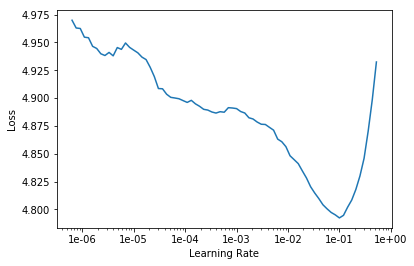

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.146663,4.005284,0.294280,19:44


In [71]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.919201,3.891070,0.306005,22:13
1,3.841725,3.817263,0.314962,22:22
2,3.793315,3.769554,0.320540,22:22
3,3.702325,3.734356,0.324746,22:21
4,3.659668,3.710056,0.327475,22:21


Buffered data was truncated after reaching the output size limit.